## Word clouds for low and high rated board games

### 2018 board game comment sentiment analysis

#### John Burt

#### Portland Data Science Group's Applied Data Science Meetup series



#### Purpose of this notebook: 

- Visualize words used most frequently in comments for games rated 1 vs games rated 10. 


Note: To install wordcloud: pip install wordcloud



In [1]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

%matplotlib inline
import pandas as pd
pd.options.display.max_columns = 100
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np

pd.options.display.max_rows = 100

# load the comments
data = pd.read_csv('boardgame-comments-english.csv')

# rename the userID column
data=data.rename(columns = {"Compiled from boardgamegeek.com by Matt Borthwick":'userID'})

data.head()

,userID,gameID,rating,comment
0,172640,24068,7.0,Good: Unique take on the hidden role games. T...
1,86674,24068,7.0,A neat social deduction game with multiple tea...
2,10643,24068,7.0,Good hidden roles werewolf style game that can...
3,31171,24068,7.0,"Overall I hate Mafia/Werewolf, but this versio..."
4,165608,24068,7.0,Fun social deduction exercise that gets merrie...


### Extract comments rated 1 and comments rated 10

In [36]:
rated1 = data[data.rating==1]
rated10 = data[data.rating==10]

print(rated1.shape,rated10.shape)

(3968, 4) (51684, 4)


### Create word clouds for comments of games rated 1 and 10. 

- Are the words different? 
- Do the most common words make sense?


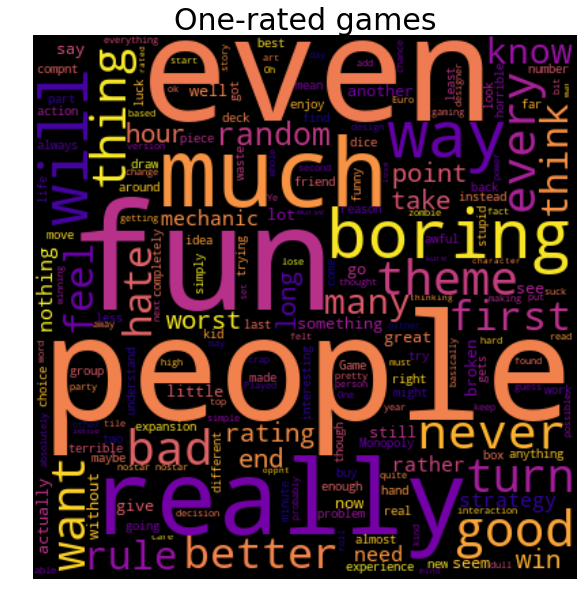

In [62]:
from wordcloud import WordCloud

# list of words that are common to both ratings comment sets. 
# We'll remove these words from the comment strings before making wordclouds.
removewords = (['game','player','played','playing','plays','play',
                'card','one','time','board','make'])

# for 1 rated games:

# concat all comments into a single string
wordstr = rated1.comment.str.cat()

# remove common words
for word in removewords:
    wordstr = wordstr.replace(word, '')

# Generate a word cloud image
wordcloud = WordCloud(width=400, height=400,colormap='plasma').generate(wordstr)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("One-rated games", fontsize=30)
plt.axis("off");


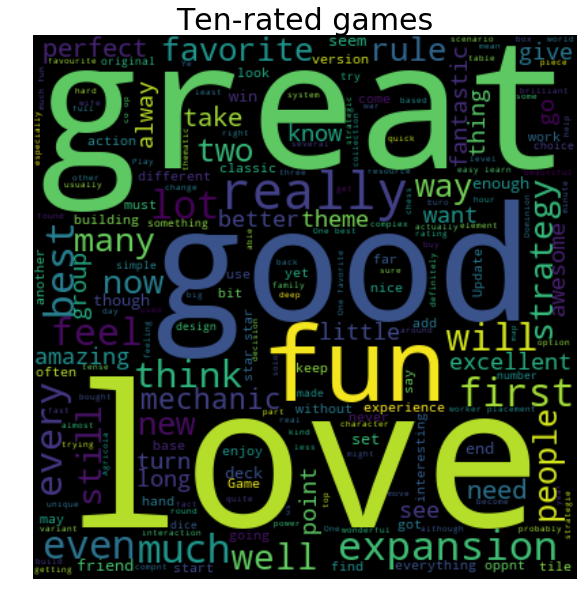

In [61]:
# for 10 rated games:

# concat all comments into a single string
wordstr = rated10.comment.str.cat()

# remove common words
for word in removewords:
    wordstr = wordstr.replace(word, '')

# Generate a word cloud image
wordcloud = WordCloud(width=400, height=400,colormap='viridis').generate(wordstr)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Ten-rated games", fontsize=30)
plt.axis("off");
